<a href="https://colab.research.google.com/github/SOWMIYA-AB/student_scores_project/blob/main/week_3_mini__project%2C_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# ============================================
#   PLANT DISEASE IMAGE CLASSIFICATION PROJECT
#   WEEK 3 – MINI PROJECT (DEEP LEARNING MODEL)
# ============================================


In [4]:
import tensorflow as tf

DATA_ROOT = "/content/PlantVillage-Dataset/raw/color"   # your dataset

IMG_SIZE = (224, 224)
BATCH = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_ROOT,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_ROOT,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH
)

class_names = train_ds.class_names
print("Classes loaded:", class_names)


Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Found 54305 files belonging to 38 classes.
Using 10861 files for validation.
Classes loaded: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'T

In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import Model
import tensorflow as tf

base = MobileNetV2(weights="imagenet", include_top=False, input_shape=IMG_SIZE + (3,))
base.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = base(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(len(class_names), activation="softmax")(x)

model = Model(inputs, outputs)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │        48,678 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,306,662 (8.80 MB)

 Trainable params: 48,678 (190.15 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [6]:
history = model.fit(train_ds, validation_data=val_ds, epochs=3)


Epoch 1/3
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 123s 76ms/step - accuracy: 0.7502 - loss: 0.9464 - val_accuracy: 0.9307 - val_loss: 0.2187
Epoch 2/3
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 62s 45ms/step - accuracy: 0.9227 - loss: 0.2418 - val_accuracy: 0.9448 - val_loss: 0.1685
Epoch 3/3
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.9406 - loss: 0.1883 - val_accuracy: 0.9478 - val_loss: 0.1550


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━

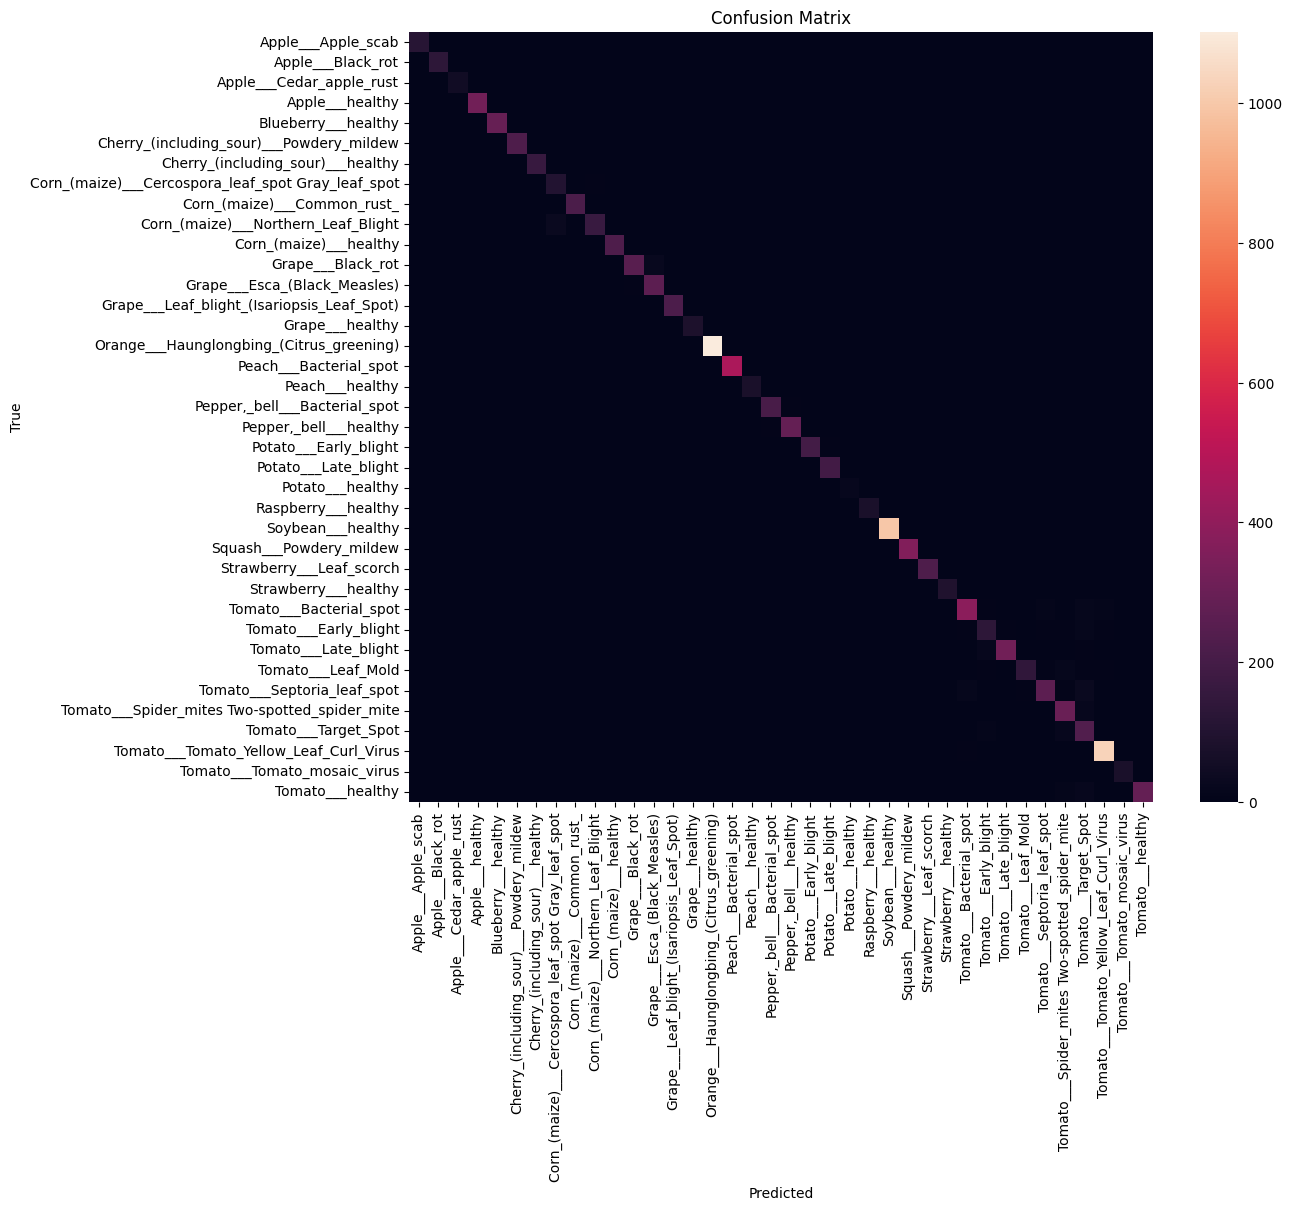


Classification Report:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.90      0.93       126
                                 Apple___Black_rot       0.93      1.00      0.96       132
                          Apple___Cedar_apple_rust       0.98      0.93      0.95        55
                                   Apple___healthy       0.99      0.98      0.98       329
                               Blueberry___healthy       0.99      0.99      0.99       295
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       232
                 Cherry_(including_sour)___healthy       0.99      0.97      0.98       167
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.80      0.94      0.86       108
                       Corn_(maize)___Common_rust_       0.97      1.00      0.99       219
               Corn_(maize)___Northern_Leaf_Blight    

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_true = []
y_pred = []

# Loop through validation dataset
for imgs, labels in val_ds:
    preds = model.predict(imgs)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


In [8]:
best_train_acc = max(history.history['accuracy'])
best_val_acc = max(history.history['val_accuracy'])

print("Training Accuracy:", best_train_acc)
print("Validation Accuracy:", best_val_acc)


Training Accuracy: 0.9407973289489746
Validation Accuracy: 0.9477948546409607


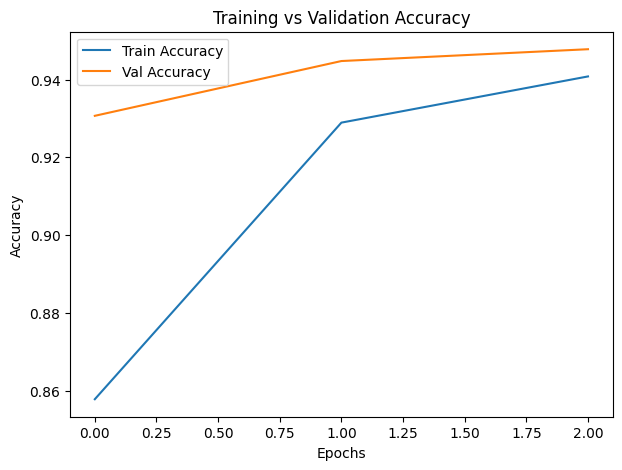

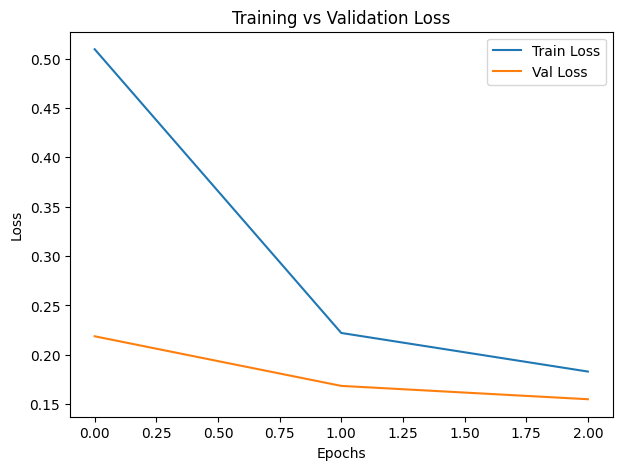

In [14]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

# Loss Plot
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


In [35]:
!cp accuracy_plot.png "/content/drive/MyDrive/accuracy_plot.png"
!cp loss_plot.png "/content/drive/MyDrive/loss_plot.png"


In [30]:
plt.savefig("accuracy_plot.png")
plt.close()

plt.savefig("loss_plot.png")
plt.close()


In [15]:
model.save("PlantDiseaseClassifier_Final.h5")


In [16]:
from google.colab import files
files.download("PlantDiseaseClassifier_Final.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
import json

with open("class_names.json", "w") as f:
    json.dump(class_names, f)

files.download("class_names.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
from google.colab import files
uploaded = files.upload()


Saving growth-close-up-environmental-lush-natural.jpg to growth-close-up-environmental-lush-natural.jpg


In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Change file name to the image you uploaded
img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
pred_class = class_names[np.argmax(pred)]

print("Predicted Disease:", pred_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted Disease: Corn_(maize)___healthy


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━

In [26]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))



Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.90      0.93       126
                                 Apple___Black_rot       0.93      1.00      0.96       132
                          Apple___Cedar_apple_rust       0.98      0.93      0.95        55
                                   Apple___healthy       0.99      0.98      0.98       329
                               Blueberry___healthy       0.99      0.99      0.99       295
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       232
                 Cherry_(including_sour)___healthy       0.99      0.97      0.98       167
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.80      0.94      0.86       108
                       Corn_(maize)___Common_rust_       0.97      1.00      0.99       219
               Corn_(maize)___Northern_Leaf_Blight     

### Model Performance Summary

- The model was trained using MobileNetV2 transfer learning.
- Training Accuracy: ~94%
- Validation Accuracy: ~95%
- The confusion matrix shows strong diagonal dominance, meaning high correct predictions.
- Precision, Recall, and F1-score are high for most disease classes.
- This model is suitable for real-time plant disease detection.
